In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import bootcampviztools as b

# 0. Carga de datos de Status.csv

In [2]:
df_status = pd.read_csv("./data/status.csv")
df_status

,statusId,status
0,1,Finished
1,2,Disqualified
2,3,Accident
3,4,Collision
4,5,Engine
...,...,...
134,137,Damage
135,138,Debris
136,139,Illness
137,140,Undertray


# 1. Creación DF separados para el cálculo de DNF (Do Not Finish) y F (Finish)

## 1.1 Obtención del listado de códigos alfabéticos que identifica que no finalizo la carrera

In [3]:
df_F1 = pd.read_csv("./data/F1.csv", low_memory=False)
df_F1.positionText.value_counts().index.values

array(['R', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'F', '10', '11',
       '12', '13', '14', '15', '16', '17', '18', '19', 'W', 'D', '20',
       'N', '21', '22', 'E', '23', '24'], dtype=object)

## 1.2 Se crea la columna "Status Race" y se le da el valor inicial de "DNF"

In [4]:
df_F1["Status Race"] = "DNF"

## 1.3 Se crea el DF "df_DNF" donde estan solo los pilotos que **NO** acabaron carreras

In [32]:
lista_DNF = ["R","F","W","N","D","E"]
df_DNF = df_F1.loc[df_F1["positionText"].isin(lista_DNF)]



## 1.4 Se crea el DF "df_Finished" donde estan solo los pilotos que **SI** que acabaron carreras

In [6]:
lista_DNF = ["R","F","W","N","D","E"]
df_Finished = df_F1.loc[~df_F1["positionText"].isin(lista_DNF)]

In [7]:
df_Finished.head(3)

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,...,lat,lng,alt,dob,nationality_x,driverName,status,name,nationality_y,Status Race
0,1,18,1,1,22,1,1,1,1,10.0,...,-37.8497,144.968,10,1985-01-07,British,Lewis Hamilton,Finished,McLaren,British,DNF
1,2,18,2,2,3,5,2,2,2,8.0,...,-37.8497,144.968,10,1977-05-10,German,Nick Heidfeld,Finished,BMW Sauber,German,DNF
2,3,18,3,3,7,7,3,3,3,6.0,...,-37.8497,144.968,10,1985-06-27,German,Nico Rosberg,Finished,Williams,British,DNF


## 1.5 Se cumplimenta la columna Status Race con "F" (Finish) en las filas filtradas con lista_DNF (pero al contrario usando ~)

In [8]:
df_F1.loc[~df_F1["positionText"].isin(lista_DNF), "Status Race"] = "F"

In [9]:
df_F1["Status Race"].value_counts()

Status Race
F      10717
DNF     5915
Name: count, dtype: int64

## 1.6 Se crea el DF "df_F_vs_DNF" sobre el que se trabajara para obtener gráficas.

In [70]:
pd.set_option("display.max_rows", None)
df_F_vs_DNF = df_F1.groupby(["year", "Status Race"])["Status Race"].count()
df_F_vs_DNF = df_F_vs_DNF.reset_index(name='count')
df_F_vs_DNF

anio_desde = 1984
anio_hasta = 1993
filtro_DNF = df_F_vs_DNF["Status Race"] == "DNF"
filtro_anio = (df_F_vs_DNF["year"] >= anio_desde) & (df_F_vs_DNF["year"] <= anio_hasta)
df_F_vs_DNF[filtro_DNF & filtro_anio]["count"].sum()
df_F_vs_DNF.head(3)


,year,Status Race,count
0,1984,DNF,262
1,1984,F,168
2,1985,DNF,222
3,1985,F,184
4,1986,DNF,235
5,1986,F,177
6,1987,DNF,227
7,1987,F,192
8,1988,DNF,273
9,1988,F,222


In [66]:
filtro_F = df_F_vs_DNF["Status Race"] == "F"
df_F_vs_DNF[filtro_F & filtro_anio]["count"].sum()



2010

In [67]:
sum = df_F_vs_DNF[filtro_DNF & filtro_anio]["count"].sum() + df_F_vs_DNF[filtro_F & filtro_anio]["count"].sum()
ratio_F = df_F_vs_DNF[filtro_F & filtro_anio]["count"].sum()/sum
ratio_DNF = df_F_vs_DNF[filtro_DNF & filtro_anio]["count"].sum()/sum
print(round(ratio_F*100,1))
print(round(ratio_DNF*100,1))

42.3
57.7


## 1.7 Se obtiene el peso de F y DNF sobre el total de cada temporada.

In [68]:
df_total_por_año = df_F_vs_DNF.groupby('year')['count'].sum().reset_index(name='total')
df_F_vs_DNF = df_F_vs_DNF.merge(df_total_por_año, on='year')

df_F_vs_DNF['percentage'] = round((df_F_vs_DNF['count'] / df_F_vs_DNF['total']) * 100,1)
pd.set_option("display.max_columns", None)
df_F_vs_DNF

,year,Status Race,count,total,percentage
0,1984,DNF,262,430,60.9
1,1984,F,168,430,39.1
2,1985,DNF,222,406,54.7
3,1985,F,184,406,45.3
4,1986,DNF,235,412,57.0
5,1986,F,177,412,43.0
6,1987,DNF,227,419,54.2
7,1987,F,192,419,45.8
8,1988,DNF,273,495,55.2
9,1988,F,222,495,44.8


## 1.7 Se crea el DF "df_percent_DNF" para usarlo mas adelante y se guarda

In [12]:
dnf_counts = df_F_vs_DNF[df_F_vs_DNF['Status Race'] == 'DNF'][['year', 'count']].rename(columns={'count': 'count_DNF'})
f_counts = df_F_vs_DNF[df_F_vs_DNF['Status Race'] == 'F'][['year', 'count']].rename(columns={'count': 'count_F'})
merged_df = pd.merge(dnf_counts, f_counts, on='year')
merged_df['ratio_DNF'] = round(merged_df['count_DNF'] / merged_df['count_F']*100,2)
df_percent_DNF= merged_df[['year', 'ratio_DNF']]
df_percent_DNF.head(3)

,year,ratio_DNF
0,1984,155.95
1,1985,120.65
2,1986,132.77


In [13]:
df_percent_DNF.to_csv("./data/df_percent_DNF.csv", index=False) 

# 2. Gráficas

## 2.1 Evolución temporal del numero de pilotos en acabar (F) y no acabar una carrera (DNF)

In [69]:
df_F_vs_DNF.head(3)

,year,Status Race,count,total,percentage
0,1984,DNF,262,430,60.9
1,1984,F,168,430,39.1
2,1985,DNF,222,406,54.7
3,1985,F,184,406,45.3
4,1986,DNF,235,412,57.0
5,1986,F,177,412,43.0
6,1987,DNF,227,419,54.2
7,1987,F,192,419,45.8
8,1988,DNF,273,495,55.2
9,1988,F,222,495,44.8


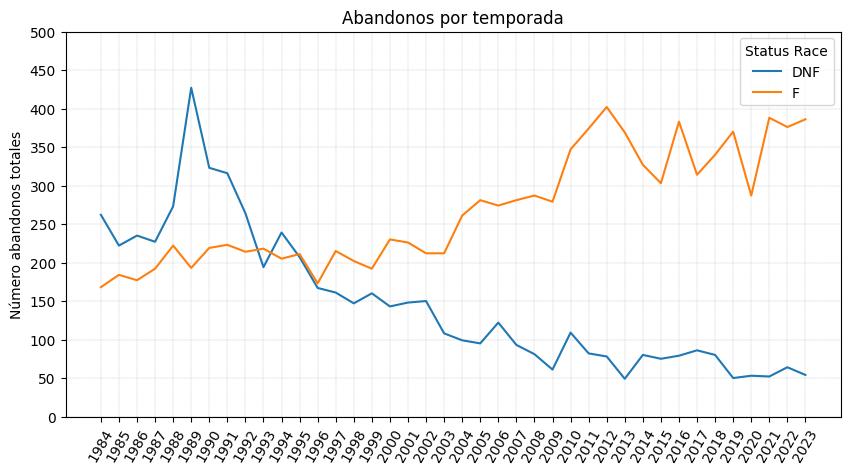

In [14]:
fig, axs = plt.subplots(nrows=1,ncols=1,figsize=(10,5))

sns.lineplot(df_F_vs_DNF, x="year", y="count", hue= "Status Race")
axs.tick_params(axis="x", labelrotation=60)
axs.set_ylabel("Número abandonos totales")
axs.set_ylim(0,500)
plt.yticks(range (0,550,50))
plt.xticks(range (1984,2024,1))
plt.grid(axis="y", linestyle = "dashed", linewidth = 0.25)
plt.grid(axis="x", linestyle = "dashed", linewidth = 0.25)
axs.set_axisbelow(True)
axs.set_title("Abandonos por temporada")
axs.set_xlabel("")

plt.savefig("./img/4_DNF/Num_abandonos_totales_temporada.png") 



## 2.1.a Evolución temporal del numero de pilotos en acabar (F) y no acabar una carrera (DNF) en %

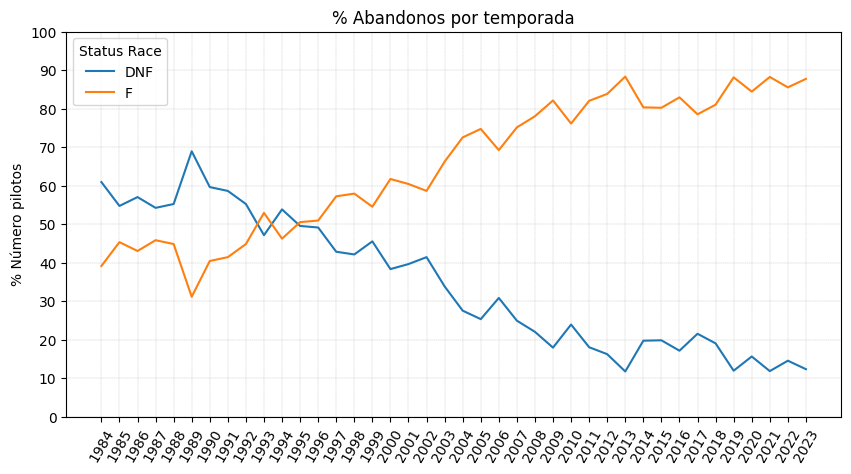

In [15]:
fig, axs = plt.subplots(nrows=1,ncols=1,figsize=(10,5))

sns.lineplot(df_F_vs_DNF, x="year", y="percentage", hue= "Status Race")
axs.tick_params(axis="x", labelrotation=60)
axs.set_ylabel("% Número pilotos")
axs.set_ylim(0,100)
plt.yticks(range (0,110,10))
plt.xticks(range (1984,2024,1))
plt.grid(axis="y", linestyle = "dashed", linewidth = 0.25)
plt.grid(axis="x", linestyle = "dashed", linewidth = 0.25)
axs.set_axisbelow(True)
axs.set_title("% Abandonos por temporada")
axs.set_xlabel("")

plt.savefig("./img/4_DNF/Num_abandonos_%_temporada.png") 


## 2.2 Evolución temporal teniendo en cuenta el número de pilotos que habia en cada temporada.

### 2.2.1 Cálculo del número de pilotos por temporada

In [16]:
df_num_drivers_per_season = df_F1.groupby(["year"])["driverName"].nunique()
df_num_drivers_per_season = df_num_drivers_per_season.reset_index(name='count')
df_num_drivers_per_season.head(3)

,year,count
0,1984,35
1,1985,36
2,1986,32


### 2.2.2 Creación del DF para hacer el la gráfica.

In [17]:
df_F_vs_DNF_ratio = pd.merge(df_F_vs_DNF, df_num_drivers_per_season, on="year", how="outer")
df_F_vs_DNF_ratio.rename(columns={"count_x":"Status_count","count_y":"Num_drivers"}, inplace=True)
df_F_vs_DNF_ratio["ratio"]=round(df_F_vs_DNF_ratio["Status_count"]/df_F_vs_DNF_ratio["Num_drivers"],1)
df_F_vs_DNF_ratio.head(80)

,year,Status Race,Status_count,total,percentage,Num_drivers,ratio
0,1984,DNF,262,430,60.9,35,7.5
1,1984,F,168,430,39.1,35,4.8
2,1985,DNF,222,406,54.7,36,6.2
3,1985,F,184,406,45.3,36,5.1
4,1986,DNF,235,412,57.0,32,7.3
...,...,...,...,...,...,...,...
75,2021,F,388,440,88.2,21,18.5
76,2022,DNF,64,440,14.5,22,2.9
77,2022,F,376,440,85.5,22,17.1
78,2023,DNF,54,440,12.3,22,2.5


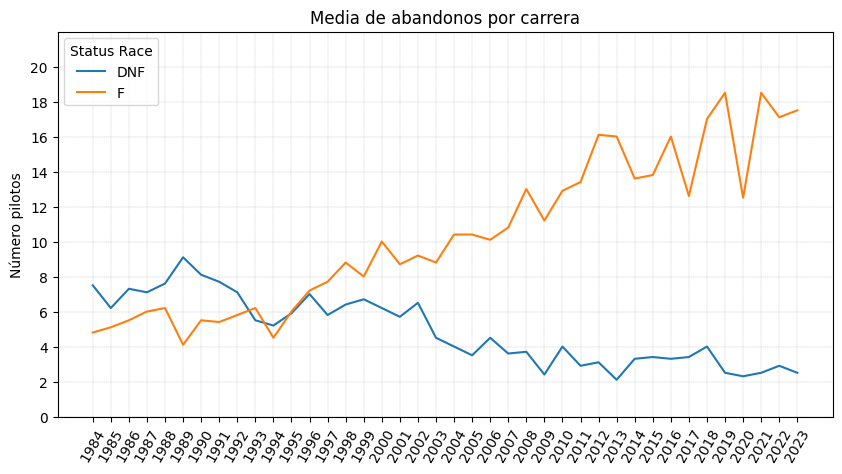

In [18]:
fig, axs = plt.subplots(nrows=1,ncols=1,figsize=(10,5))

sns.lineplot(df_F_vs_DNF_ratio, x="year", y="ratio", hue= "Status Race")
axs.tick_params(axis="x", labelrotation=60)
axs.set_ylabel("Número pilotos")
axs.set_ylim(0,22)
plt.yticks(range (0,22,2))
plt.xticks(range (1984,2024,1))
plt.grid(axis="y", linestyle = "dashed", linewidth = 0.25)
plt.grid(axis="x", linestyle = "dashed", linewidth = 0.25)
axs.set_axisbelow(True)
axs.set_title("Media de abandonos por carrera")
axs.set_xlabel("")

plt.savefig("./img/4_DNF/Media_abandonos_topor_carrera_temporada.png") 


# 2.3 Evolución número de pilotos por temporada

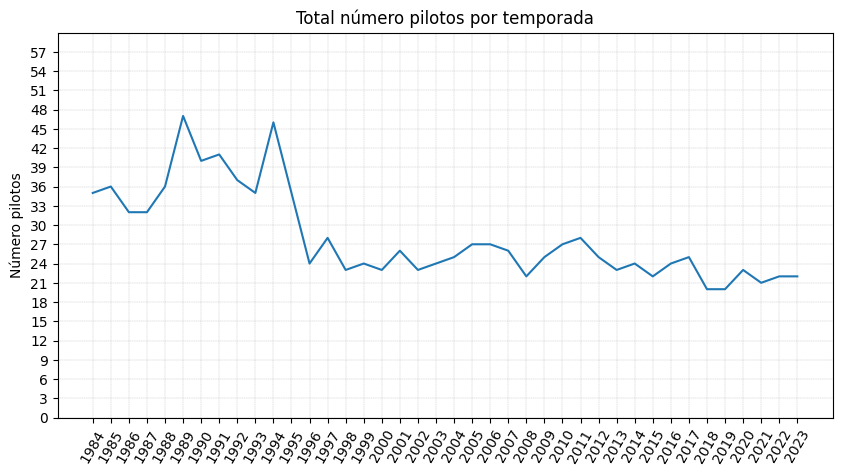

In [19]:
fig, axs = plt.subplots(nrows=1,ncols=1,figsize=(10,5))

sns.lineplot(df_num_drivers_per_season, x="year", y="count")
axs.tick_params(axis="x", labelrotation=60)
axs.set_ylabel("Número pilotos")
axs.set_ylim(0,60)
plt.yticks(range (0,60,3))
plt.xticks(range (1984,2024,1))
plt.grid(axis="y", linestyle = "dashed", linewidth = 0.25)
plt.grid(axis="x", linestyle = "dashed", linewidth = 0.25)
axs.set_axisbelow(True)
axs.set_title("Total número pilotos por temporada")
axs.set_xlabel("")

plt.savefig("./img/4_DNF/Num_total_pilotos_temporada.png") 


# 2.4 Boxplot sobre la variable binaria "Status Race"

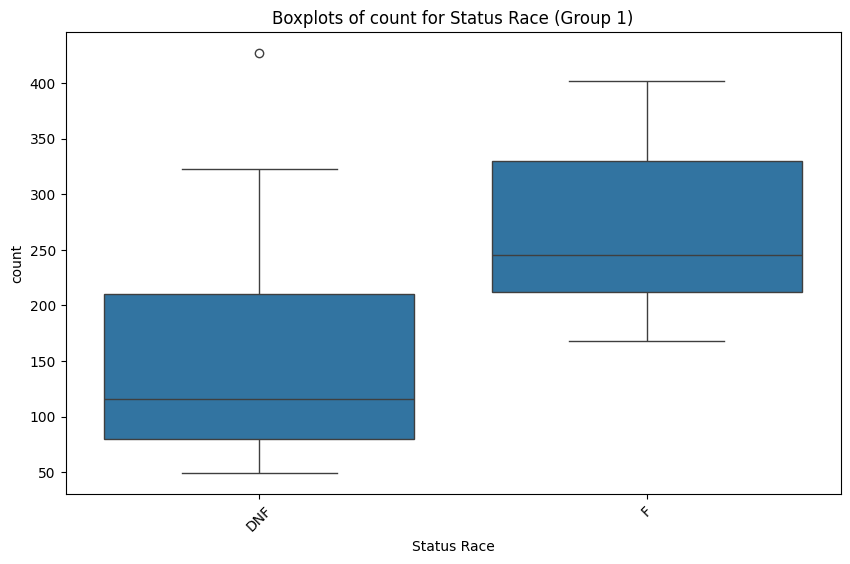

In [20]:
b.plot_grouped_boxplots(df_F_vs_DNF, "Status Race","count")

# 2.5 Gráfico de dispersión con regresión cúlineal e intervalo de confianza

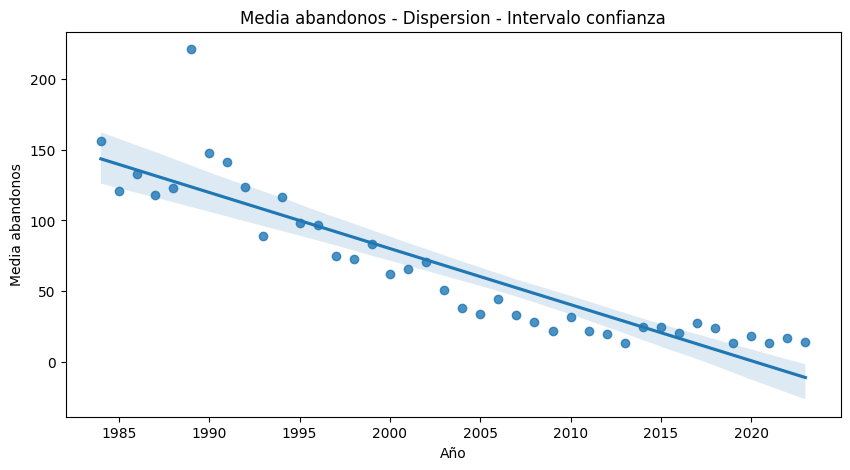

In [21]:
fig, axs = plt.subplots(nrows=1,ncols=1,figsize=(10,5))
sns.regplot(data=df_percent_DNF, x="year", y="ratio_DNF", order=1)
plt.title("Media abandonos - Dispersion - Intervalo confianza")
plt.xlabel("Año")
plt.ylabel("Media abandonos")
plt.savefig("./img/4_DNF/Dispersion_abandonos.png")  

# 2.6 Estudio DNF por circuito

## 2.6.1 Número de DNF por circuito

In [22]:
año_desde = 2006
año_hasta = 2007
df_dnf = df_F1[(df_F1['Status Race'] == 'DNF')&(df_F1['year'] >= año_desde) & (df_F1['year'] < año_hasta)]
#df_dnf = df_F1[df_F1['Status Race'] == 'DNF']
dnf_counts = df_dnf.groupby(['name_y', 'circuitId']).size().reset_index(name='DNF_Count')
dnf_counts.columns = ['circuitName', 'circuitId', 'DNF_Count']
dnf_counts = dnf_counts.sort_values(by='DNF_Count', ascending=False)
dnf_counts.circuitName.value_counts()

circuitName
Indianapolis Motor Speedway       1
Hockenheimring                    1
Silverstone Circuit               1
Bahrain International Circuit     1
Autodromo Nazionale di Monza      1
Autódromo José Carlos Pace        1
Circuit de Monaco                 1
Circuit de Barcelona-Catalunya    1
Shanghai International Circuit    1
Autodromo Enzo e Dino Ferrari     1
Circuit de Nevers Magny-Cours     1
Istanbul Park                     1
Circuit Gilles Villeneuve         1
Sepang International Circuit      1
Albert Park Grand Prix Circuit    1
Nürburgring                       1
Hungaroring                       1
Suzuka Circuit                    1
Name: count, dtype: int64

### a) Cargamos el archivo weather_overtakes ya que tiene los mismo nombres de circuitos y podremos linkarlo correctamente a df_F1 gracias al circuitId

In [23]:
df_weather_overtake = pd.read_csv("./data/weather_overtake_bs_completed.csv") 

race_counts = df_weather_overtake.groupby(['Race', 'circuitId']).size().reset_index(name='Count')
race_counts.columns = ['Race', 'circuitId', 'Count']
race_counts = race_counts.sort_values(by='Count', ascending=False)
race_counts.Race.value_counts()

Race
Europe              6
USA                 4
France              3
Spain               2
Portugal            2
Australia           2
Germany             2
Brazil              2
Japan               2
Belgium             2
Great Britain       2
Miami               1
Emilia-Romagna      1
India               1
Saudi Arabia        1
South Africa        1
Luxembourg          1
Tuscany             1
Styria              1
Qatar               1
Pacific             1
South Korea         1
Sakhir              1
Dallas              1
Las Vegas           1
Eifel               1
Argentina           1
Italy               1
Detroit             1
China               1
Hungary             1
Canada              1
San Marino          1
Austria             1
Bahrain             1
Malaysia            1
Mexico              1
Netherlands         1
Abu Dhabi           1
Singapore           1
Monaco              1
Turkey              1
Russia              1
Azerbaijan          1
70th Anniversary    1
Name:

### b) Hacemos join y quitamos duplicados

In [24]:
df_DNF_circuit = pd.merge(dnf_counts, race_counts, on="circuitId", how="outer")
duplicados = df_DNF_circuit.duplicated(subset=["circuitName","circuitId"], keep="first")
df_DNF_circuit=df_DNF_circuit[~duplicados]

### c) Se crea la columna "ratio_DNF", y se le da el valor de la division que muestra el codigo para obtener el ratio

In [25]:
df_DNF_circuit
df_DNF_circuit["ratio_DNF"] = 0
df_DNF_circuit["ratio_DNF"]=round(df_DNF_circuit["DNF_Count"]/df_DNF_circuit["Count"],1)

### d) Dataframe limpio y listo para graficar y sacar datos

In [26]:
df_DNF_circuit.head(3)

,circuitName,circuitId,DNF_Count,Race,Count,ratio_DNF
0,Albert Park Grand Prix Circuit,1,9.0,Australia,26,0.3
1,Sepang International Circuit,2,8.0,Malaysia,19,0.4
2,Bahrain International Circuit,3,4.0,Bahrain,19,0.2


In [27]:
df_DNF_circuit.sort_values('ratio_DNF', ascending=False).head(3)

,circuitName,circuitId,DNF_Count,Race,Count,ratio_DNF
20,Indianapolis Motor Speedway,19,13.0,USA,8,1.6
21,Nürburgring,20,9.0,Europe,12,0.8
5,Istanbul Park,5,7.0,Turkey,9,0.8


## 2.6.2 Gráfico Media DNF por circuito

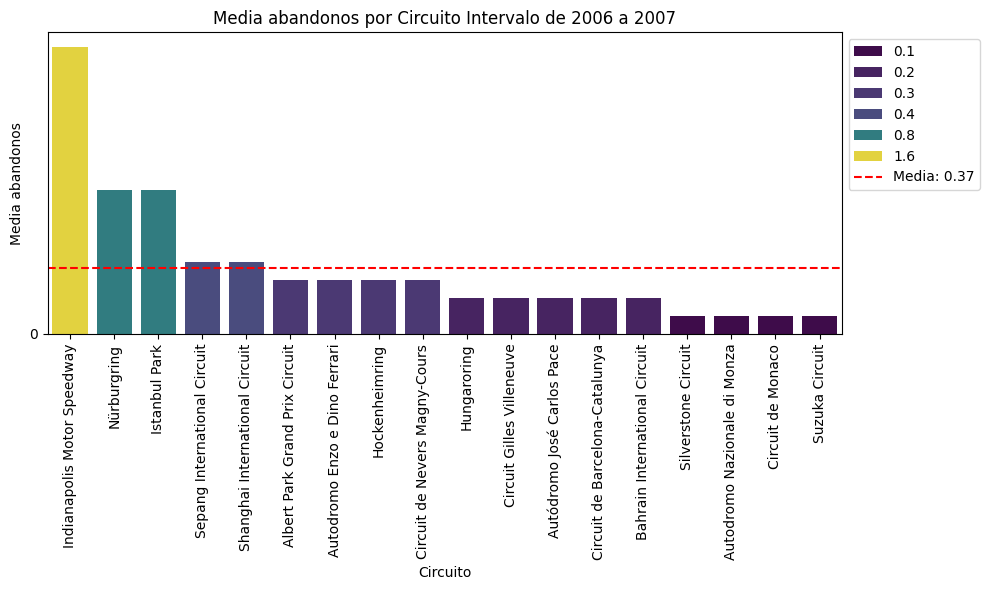

In [28]:
df_sorted = df_DNF_circuit.sort_values(by='ratio_DNF', ascending=False)
mean_ratio_dnf = df_sorted['ratio_DNF'].mean()

plt.figure(figsize=(10, 6))
sns.barplot(x='circuitName', y='ratio_DNF', data=df_sorted, hue="ratio_DNF", palette='viridis')

axs.set_ylim(0,1)
plt.yticks(range (0,1,1))
plt.axhline(mean_ratio_dnf, color='red', linestyle='--', label=f'Media: {mean_ratio_dnf:.2f}')
plt.xlabel('Circuito')
plt.ylabel('Media abandonos')
plt.title(f"Media abandonos por Circuito Intervalo de {año_desde} a {año_hasta}")
plt.xticks(rotation=90)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.savefig(f"./img/4_DNF/9_Abandonos_circuito_con_media{año_desde}_{año_hasta}.png", bbox_inches='tight')  
plt.tight_layout()
plt.show()

## 2.6.3 Histograma Ratio DNF

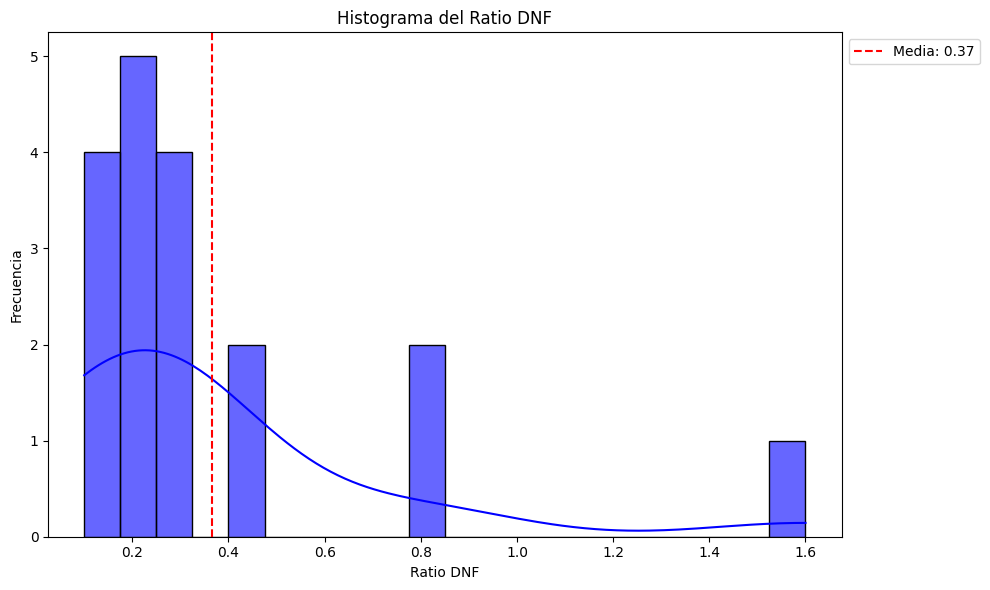

In [29]:
mean_ratio_dnf = df_DNF_circuit['ratio_DNF'].mean()

plt.figure(figsize=(10, 6))
sns.histplot(df_DNF_circuit['ratio_DNF'], bins=20, kde=True, color='blue', alpha=0.6)

plt.axvline(mean_ratio_dnf, color='red', linestyle='--', label=f'Media: {mean_ratio_dnf:.2f}')
plt.xlabel('Ratio DNF')
plt.ylabel('Frecuencia')
plt.title('Histograma del Ratio DNF')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.savefig("./img/4_DNF/Histo_abandonos.png", bbox_inches='tight')  
plt.tight_layout() 
plt.show()



## 2.6.4 Cálculo % circuitos por debajo de la media de DNF

In [30]:
mean_ratio_dnf = df_DNF_circuit['ratio_DNF'].mean()
count_below_mean = df_DNF_circuit[df_DNF_circuit['ratio_DNF'] < mean_ratio_dnf].shape[0]
total_circuits = df_DNF_circuit.shape[0]
percentage_below_mean = (count_below_mean / total_circuits) * 100

print(f'Porcentaje de circuitos por debajo de la media: {percentage_below_mean:.2f}%')

Porcentaje de circuitos por debajo de la media: 25.00%
